In [2]:
import subprocess as sp
import matplotlib.pyplot as plt

from __init__ import *
from snmcseq_utils import create_logger
from snmcseq_utils import cd

In [3]:
log = create_logger()
log.info('.')

04/11/2018 01:19:02 PM .


In [49]:
dataset = 'CEMBA_3A_180129'
path_dataset = os.path.join(PATH_DATASETS, dataset)

# Gzip to bgzip

In [ ]:
# make allc folder and symlic from from_ecker_lab

os.makedirs(os.path.join(path_dataset, 'allc'))

## Case 1

In [5]:
# allc_folders = glob.glob(os.path.join(path_dataset, 'from_ecker_lab', '*'))

# should be parallelized in the future
# for i, allc_folder in enumerate(allc_folders):
data_folder = os.path.join(PATH_DATASETS, dataset, 'from_ecker_lab')
with cd(data_folder):
    allc_files = glob.glob('allc_*.tsv.gz')
    allc_files = glob.glob('allc_180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_D9_AD010.tsv.gz')
    for i, allc_file in enumerate(allc_files):
        # if src == 'allc_180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_1_CEMBA180104_4B_2_H8_AD002_indexed.tsv.gz':
        
        src = allc_file
        
        dst = os.path.join(path_dataset, 'allc', src)
        dst = (os.path.splitext(dst)[0] +'.bgz')

        logging.info("gzip to bgzip ({}/{}): {}".format(i+1, len(allc_files), src))
        
        # .tsv.gz to .tsv 
        cmd = 'gzip -cd {} > {}'.format(src, os.path.splitext(src)[0]) 
        os.system(cmd)

        # bgzip
        cmd = 'bgzip -c {} > {}'.format(os.path.splitext(src)[0], dst) 
        os.system(cmd)

        # rm tmp files
        os.remove(os.path.splitext(src)[0])

03/18/2018 08:48:27 PM gzip to bgzip (1/1): allc_180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_D9_AD010.tsv.gz


## Case 2

In [ ]:
allc_folders = glob.glob(os.path.join(path_dataset, 'from_ecker_lab', '*'))
# should be parallelized in the future
for i, allc_folder in enumerate(allc_folders):
    with cd(allc_folder):
        allc_files = glob.glob('allc_*.tsv.gz')
        assert len(allc_files) == 1
        src = allc_files[0]
    
        # if src == 'allc_180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_1_CEMBA180104_4B_2_H8_AD002_indexed.tsv.gz':
        dst = os.path.join(path_dataset, 'allc', src)
        dst = (os.path.splitext(dst)[0] +'.bgz')

        logging.info("gzip to bgzip ({}/{}): {}".format(i+1, len(allc_folders), src))
        # .tsv.gz to .tsv 
        cmd = 'gzip -cd {} > {}'.format(src, os.path.splitext(src)[0]) 
        os.system(cmd)

        # bgzip
        cmd = 'bgzip -c {} > {}'.format(os.path.splitext(src)[0], dst) 
        os.system(cmd)

        # rm tmp files
        os.remove(os.path.splitext(src)[0])


# Tabix index

In [11]:
# try tabix (could be parallelized)
with cd(os.path.join(path_dataset, 'allc')):
    allc_files = glob.glob(os.path.join(path_dataset, 'allc', '*'))
    allc_files = glob.glob(os.path.join(path_dataset, 'allc', 'allc_180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_D9_AD010.tsv.bgz'))
    for i, allc_file in enumerate(allc_files):
        os.system('tabix -f -s 1 -b 2 -e 2 -S 0 ' + allc_file) 
        logging.info("Done tabix indexing ({}/{}): {}".format(i+1, len(allc_files), allc_file))

FileNotFoundError: [Errno 2] No such file or directory: '/cndd/Public_Datasets/CEMBA/snmCSeq/Datasets/CEMBA_3A_180129/allc'

# Mapping summary

In [50]:
# mapping summary
f = os.path.join(PATH_REFERENCES, 'Mapping_summary', 'CEMBA_3A_summary.txt')
df = pd.read_table(f) 
# filter

df['dataset'] = df['Sample'].apply(lambda x: '_'.join(['CEMBA', 
                                       x.split('_')[7],
                                       x.split('_')[6][len('CEMBA'):]]
                                                     ))
df = df[df['dataset']==dataset].drop('dataset', axis=1)
print(df.shape)
df.head()

(1385, 15)


,Sample,Total reads,Mapped reads,Mapping rate,Nonclonal reads,% Nonclonal rate,Filtered reads,Filtered rate,Lambda mC/C,mCCC/CCC,mCG/CG,mCH/CH,Estimated mCG/CG,Estimated mCH/CH,% Genome covered
0,180215_CEMBA_mm_P56_P63_3A_CEMBA180129_3A_1_CE...,4751680,3088376,0.650,NaN,0.0,1991991,NaN,0.00607,0.00617,0.80902,0.02460,0.80783,0.01854,8.19
1,180215_CEMBA_mm_P56_P63_3A_CEMBA180129_3A_1_CE...,4096726,2687323,0.656,NaN,0.0,1715318,NaN,0.01930,0.00816,0.81577,0.03535,0.81425,0.02741,7.08
2,180215_CEMBA_mm_P56_P63_3A_CEMBA180129_3A_1_CE...,4296492,2811700,0.654,NaN,0.0,1806411,NaN,0.00432,0.00686,0.81424,0.02651,0.81296,0.01979,7.43
3,180215_CEMBA_mm_P56_P63_3A_CEMBA180129_3A_1_CE...,5275532,3333754,0.632,NaN,0.0,2127066,NaN,0.00761,0.00741,0.81089,0.03099,0.80948,0.02376,8.70
4,180215_CEMBA_mm_P56_P63_3A_CEMBA180129_3A_1_CE...,5070812,3321844,0.655,NaN,0.0,2072028,NaN,0.00235,0.00542,0.77764,0.02131,0.77643,0.01598,8.48


In [41]:
# move allc inplace

dst = '/cndd/Public_Datasets/CEMBA/snmCSeq/Datasets/{}/from_ecker_lab'.format(dataset)
if not os.path.isdir(dst):
    os.makedirs(dst)
    
with cd('/cndd/Public_Datasets/CEMBA/snmCSeq/Datasets/3A/from_ecker_lab'):
    dirs = [dirc for dirc in sorted(glob.glob('*')) if os.path.isdir(dirc)]
    for dirc in dirs:
        if dirc[:-len('_bismark')] in df['Sample'].tolist():
            print(dirc)
            cmd = 'mv {} {}'.format(dirc, dst)
            os.system(cmd)
            
            
#     for sample in df['Sample']:
        
#         cmd = ''
#         os.system()
#         print(sample)

180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_A10_AD001_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_A10_AD002_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_A10_AD004_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_A10_AD006_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_A10_AD007_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_A10_AD008_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_A10_AD010_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_A10_AD012_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_A11_AD001_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_A11_AD002_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_A11_AD004_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1

180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_B2_AD001_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_B2_AD002_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_B2_AD006_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_B2_AD007_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_B2_AD008_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_B2_AD010_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_B2_AD012_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_B3_AD001_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_B3_AD002_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_B3_AD004_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_B3_AD006_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA18013

180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_C3_AD010_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_C3_AD012_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_C4_AD001_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_C4_AD002_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_C4_AD004_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_C4_AD006_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_C4_AD007_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_C4_AD008_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_C4_AD010_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_C4_AD012_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_C5_AD001_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA18013

180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_D7_AD004_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_D7_AD006_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_D7_AD007_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_D7_AD008_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_D7_AD010_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_D7_AD012_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_D8_AD001_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_D8_AD004_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_D8_AD006_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_D8_AD007_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_D8_AD008_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA18013

180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_F10_AD004_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_F10_AD006_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_F10_AD007_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_F10_AD008_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_F10_AD010_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_F10_AD012_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_F11_AD001_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_F11_AD002_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_F11_AD004_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_F11_AD006_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_F11_AD007_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1

180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_G2_AD001_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_G2_AD002_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_G2_AD004_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_G2_AD006_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_G2_AD007_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_G2_AD010_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_G2_AD012_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_G3_AD001_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_G3_AD002_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_G3_AD004_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_G3_AD006_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA18013

180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_H3_AD008_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_H3_AD010_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_H3_AD012_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_H4_AD001_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_H4_AD002_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_H4_AD004_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_H4_AD006_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_H4_AD007_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_H4_AD008_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_H4_AD010_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA180130_3A_2_H4_AD012_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_1_CEMBA18013

180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_A7_AD001_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_A7_AD002_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_A7_AD004_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_A7_AD006_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_A7_AD007_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_A7_AD008_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_A7_AD010_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_A7_AD012_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_A8_AD001_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_A8_AD002_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_A8_AD004_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA18013

180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_B8_AD007_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_B8_AD008_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_B8_AD010_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_B8_AD012_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_B9_AD001_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_B9_AD002_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_B9_AD007_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_B9_AD008_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_B9_AD012_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_C10_AD001_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_C10_AD002_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180

180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_D1_AD006_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_D1_AD007_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_D1_AD008_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_D1_AD010_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_D1_AD012_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_D2_AD001_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_D2_AD002_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_D2_AD004_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_D2_AD006_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_D2_AD007_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_D2_AD008_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA18013

180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_E3_AD008_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_E3_AD010_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_E5_AD001_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_E5_AD002_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_E5_AD004_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_E5_AD006_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_E5_AD007_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_E5_AD008_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_E5_AD010_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_E5_AD012_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_E6_AD001_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA18013

180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_F7_AD004_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_F7_AD007_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_F7_AD008_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_F7_AD010_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_F7_AD012_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_F8_AD001_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_F8_AD002_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_F8_AD004_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_F8_AD006_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_F8_AD007_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_F8_AD008_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA18013

180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_G9_AD001_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_G9_AD002_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_G9_AD006_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_G9_AD007_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_G9_AD008_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_G9_AD010_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_G9_AD012_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_H10_AD001_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_H10_AD002_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_H10_AD004_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA180130_3A_4_H10_AD006_indexed_bismark
180215_CEMBA_mm_P56_P63_3A_CEMBA180130_3A_3_CEMBA1

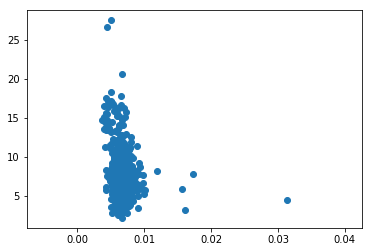

In [51]:

fig, ax = plt.subplots()
ax.scatter(df['mCCC/CCC'].values, df['% Genome covered'].values)
plt.show()


In [52]:
# move allc to allc trash

print(df.loc[df['mCCC/CCC'] > 0.02, 'Sample'].tolist())

df[df['mCCC/CCC']<0.02].set_index('Sample').to_csv(
    os.path.join(PATH_DATASETS, dataset, 'mapping_summary_{}.tsv'.format(dataset)), 
    sep='\t', na_rep='NA', header=True, index=True)

# truncate mapping summary and copy that into right place

['180215_CEMBA_mm_P56_P63_3A_CEMBA180129_3A_1_CEMBA180129_3A_2_G5_AD012_indexed']


In [17]:
with cd(path_dataset)
    allc_files = sorted(glob.glob('./allc/allc_*.tsv.bgz'))
    cells = [os.path.basename(allc_file)[len('allc_'): -len('.tsv.bgz')] for allc_file in allc_files]
df_meta_dataset = df.set_index('Sample').loc[cells, :]

In [9]:
print(df_meta_dataset.shape)

df_meta_dataset.to_csv(os.path.join(path_dataset, 'mapping_summary_{}.tsv'.format(dataset)), 
                      sep='\t', na_rep='NA', header=True, index=True)
df_meta_dataset.head()

NameError: name 'df_meta_dataset' is not defined